# Project: Wrangling and Analyze Data

### Content
- [Project Objectives](#obj)
- [Import Libraries](#import)
- [Step 1: Gathering data](#gather)
- [Step 2: Assessing data](#access)
- [Step 3: Cleaning data](#clean)
- [Step 4: Storing data](#store)
- [Step 5: Analyzing, and visualizing data](#analyze)
- [Step 6: Reporting](#report)

<a id='obj'></a>
## Project objectives

### Goal 
Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"- worthy analyses and visualizations.

### Objectives
- Perform data wrangling on the provided sources (three) of data.
    - Gathering: Data would be gathered in three different ways;
        - Download/Uploaded: WeRateDogs Twitter archive containing basic tweet data for all 5000+ of their tweets.
        - Scrapping: Image prediction file. Prdiction file through neural network for classification. The results are a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
        - API: Query Twitter's API to gather valuable data for the WeRateDogs Twitter archive and specifically the tweet IDs within it.
    - Assessing and 
    - Cleaning
- Store, analyze, and visualize the wrangled data.
- Reporting on:
    - data wrangling efforts and
    - data analyses and visualizations.

### Additional Project Requirement
- In the analysis, only original tweets/ratings that have images should be used (no retweets nor replies).

<a id='import'></a>
## Importing Libraries

In [1]:
# Importing libraries
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
import json
import tweepy
import os
import glob

<a id='gather'></a>
## Gathering Data
In the cell below, gather all three pieces of data for this project and load them in the notebook. Note: the methods required to gather each data are different.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#read csv file after download manually
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# preview
twitter_archive.sample(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1920  674265582246694913                    NaN                  NaN   
679   789137962068021249                    NaN                  NaN   

                      timestamp  \
1920  2015-12-08 16:33:36 +0000   
679   2016-10-20 16:15:26 +0000   

                                                 source  \
1920  <a href="http://twitter.com/download/iphone" r...   
679   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1920  This is Henry. He's a shit dog. Short pointy e...                  NaN   
679   This is Bo. He's a West Congolese Bugaboop Snu...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1920                       NaN                        NaN   
679                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1920  https://twitter.com/dog_rates/status/674265582...                 2   
679   https://twitter.com/dog_rates/status/789137962...                12   

      rating_denominator   name doggo floofer pupper puppo  
1920                  10  Henry  None    None   None  None  
679                   10     Bo  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# download image_predictions using the request library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [5]:
# Read tsv file after download via request
prediction = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
# preview
prediction.sample(2)

tweet_id                                          jpg_url  \
2035  884162670584377345  https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg   
1393  767191397493538821  https://pbs.twimg.com/media/CqWcgcqWcAI43jm.jpg   

      img_num               p1   p1_conf  p1_dog         p2   p2_conf  p2_dog  \
2035        1  German_shepherd  0.707046    True   malinois  0.199396    True   
1393        1            patio  0.708665   False  boathouse  0.110056   False   

                      p3   p3_conf  p3_dog  
2035  Norwegian_elkhound  0.049148    True  
1393                pier  0.039532   False

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# consumer_key = 'XXXX'
# consumer_secret = 'XXXX'
# access_token = 'XXXXs'
# access_secret = 'XXXX'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth)

Make a list of all twitter ids and iteratively get all tweets via the twitter api for tweet ids.

In [8]:
# tweet_ids = list(twitter_archive.tweet_id)

# tweet_data = {}
# for tweet in tweet_ids:
#     try:
#         tweet_status = api.get_status(tweet)
#         tweet_data[str(tweet)] = tweet_status._json
#     except:
#         print("Error for: " + str(tweet))

Since The data that should be gathered via twitter API (by the previous code) is supported in the project resources by Udacity as zip file, I would just load the zip and read.

In [9]:
# Load
tweets_txt = [json.loads(file) for file in open('tweet-json.txt','r')]

# check for the extracted file
tweets_txt

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},

<a id='access'></a>
## Assessing data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

**So now we have the three dataset:**
1. twitter archive uploaded directly: `twitter_archive`
2. image prediction via request: `prediction`
3. tweets via api: `tweets_txt`

Next we visually assesss the data one after the other.

In [10]:
# twitter_archive
twitter_archive.sample(6)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1470  694001791655137281                    NaN                  NaN   
965   750429297815552001                    NaN                  NaN   
1480  693486665285931008                    NaN                  NaN   
1085  738184450748633089                    NaN                  NaN   
862   762699858130116608                    NaN                  NaN   
2001  672482722825261057                    NaN                  NaN   

                      timestamp  \
1470  2016-02-01 03:38:15 +0000   
965   2016-07-05 20:41:01 +0000   
1480  2016-01-30 17:31:20 +0000   
1085  2016-06-02 01:44:22 +0000   
862   2016-08-08 17:19:51 +0000   
2001  2015-12-03 18:29:09 +0000   

                                                 source  \
1470  <a href="http://twitter.com/download/iphone" r...   
965   <a href="http://twitter.com/download/iphone" r...   
1480  <a href="http://twitter.com/download/iphone" r...   
1085  <a href="http://twitter.com/download/iphone" r...   
862   <a href="http://twitter.com/download/iphone" r...   
2001  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1470  This is Chester. He's a Benefloof Cumberbark. ...                  NaN   
965   This is Arnie. He's a Nova Scotian Fridge Floo...                  NaN   
1480  This is Lincoln. He doesn't understand his new...                  NaN   
1085  For the last time, we only rate dogs. Pls stop...                  NaN   
862   This is Leela. She's a Fetty Woof. Lost eye wh...                  NaN   
2001  This is light saber pup. Ready to fight off ev...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1470                       NaN                        NaN   
965                        NaN                        NaN   
1480                       NaN                        NaN   
1085                       NaN                        NaN   
862                        NaN                        NaN   
2001                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1470  https://twitter.com/dog_rates/status/694001791...                11   
965   https://twitter.com/dog_rates/status/750429297...                12   
1480  https://twitter.com/dog_rates/status/693486665...                11   
1085  https://twitter.com/dog_rates/status/738184450...                 9   
862   https://twitter.com/dog_rates/status/762699858...                11   
2001  https://twitter.com/dog_rates/status/672482722...                10   

      rating_denominator     name doggo floofer pupper puppo  
1470                  10  Chester  None    None   None  None  
965                   10    Arnie  None    None   None  None  
1480                  10  Lincoln  None    None   None  None  
1085                  10     None  None    None   None  None  
862                   10    Leela  None    None   None  None  
2001                  10    light  None    None   None  None

In [11]:
# Check info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [13]:
# iterate over columns for duplicates using a function
def check_dup(df):
    """
    A function that every column of a dataframe for duplicates.
    Inputs:
    :param df: Dataframe.
    Outputs:
    A list of all duplicate column.
    """
    dup_list = []
    for col in df:
        if df[col].duplicated().sum() > 0:
            dup_list.append(col)
    return dup_list

check_dup(twitter_archive)

['in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

__Observations:__
- Some interesting duplicates for source, and expanded_urls columns.
- Info and sample methods shows som missing data, erronous datatypes, and some invalid data for names, doggo, floofer, pupper and puppo.
- describe method shows that the maximum ratings for numerators and denominator not valid, the mean, 25%,50% and 75% shows more realistic values.

Let's take a closer look at names, doggo, floofer, pupper, puppo, and ratings.

__name cloumn:__

In [14]:
# check for name column
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Bailey         7
an             7
Buddy          7
Toby           7
Daisy          7
Dave           6
Jack           6
Milo           6
Bella          6
Jax            6
Leo            6
Stanley        6
Koda           6
Scout          6
Rusty          6
Oscar          6
Alfie          5
            ... 
Huxley         1
Aldrick        1
Sprout         1
Brooks         1
Lacy           1
Barney         1
Bobbay         1
Pilot          1
Zeus           1
Obie           1
Cupid          1
Jimbo          1
Jerome         1
Leonidas       1
Champ          1
Bauer          1
Donny          1
Yoda           1
Gert           1
Amélie         1
Rooney         1
Ace            1
Berkeley       1
Opie           1
Ashleigh       1
Clyde          1
Alejandro      1
Brockly       

In [15]:
# check if dog's name are all titled column
twitter_archive.name.str.istitle().value_counts()

True     2241
False     115
Name: name, dtype: int64

In [16]:
# Check to see unique names of dogs in lower case
twitter_archive.name.loc[twitter_archive.name.str.istitle() == False].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'], dtype=object)

__Rating Columns:__

In [18]:
# check for rating_denominator values that are not 10
# pd.set_option('display.max_colwidth', None)
twitter_archive.loc[twitter_archive.rating_denominator != 10 , ['tweet_id', 'text','name','rating_numerator','rating_denominator']]

tweet_id                                               text  \
313   835246439529840640  @jonnysun @Lin_Manuel ok jomny I know you're e...   
342   832088576586297345           @docmisterio account started on 11/15/15   
433   820690176645140481  The floofs have been released I repeat the flo...   
516   810984652412424192  Meet Sam. She smiles 24/7 &amp; secretly aspir...   
784   775096608509886464  RT @dog_rates: After so many requests, this is...   
902   758467244762497024  Why does this never happen at my front door......   
1068  740373189193256964  After so many requests, this is Bretagne. She ...   
1120  731156023742988288  Say hello to this unbelievably well behaved sq...   
1165  722974582966214656  Happy 4/20 from the squad! 13/10 for all https...   
1202  716439118184652801  This is Bluebert. He just saw that both #Final...   
1228  713900603437621249  Happy Saturday here's 9 puppers on a bench. 99...   
1254  710658690886586372  Here's a brigade of puppers. All look very pre...   
1274  709198395643068416  From left to right:\nCletus, Jerome, Alejandro...   
1351  704054845121142784  Here is a whole flock of puppers.  60/50 I'll ...   
1433  697463031882764288  Happy Wednesday here's a bucket of pups. 44/40...   
1598  686035780142297088  Yes I do realize a rating of 4/20 would've bee...   
1634  684225744407494656  Two sneaky puppers were not initially seen, mo...   
1635  684222868335505415  Someone help the girl is being mugged. Several...   
1662  682962037429899265  This is Darrel. He just robbed a 7/11 and is i...   
1663  682808988178739200  I'm aware that I could've said 20/16, but here...   
1779  677716515794329600  IT'S PUPPERGEDDON. Total of 144/120 ...I think...   
1843  675853064436391936  Here we have an entire platoon of puppers. Tot...   
2335  666287406224695296  This is an Albanian 3 1/2 legged  Episcopalian...   

          name  rating_numerator  rating_denominator  
313       None               960                   0  
342       None                11                  15  
433       None                84                  70  
516        Sam                24                   7  
784       None                 9                  11  
902       None               165                 150  
1068      None                 9                  11  
1120      this               204                 170  
1165      None                 4                  20  
1202  Bluebert                50                  50  
1228      None                99                  90  
1254      None                80                  80  
1274      None                45                  50  
1351         a                60                  50  
1433      None                44                  40  
1598      None                 4                  20  
1634      None               143                 130  
1635      None               121                 110  
1662    Darrel                 7                  11  
1663      None                20                  16  
1779      None               144                 120  
1843      None                88                  80  
2335        an                 1                   2

In [19]:
# check for rating_numerator values that are > 14. From overview numerators rating is almost always greater than 10.
# 11/10, 12/10, 13/10 e.t.c and mean is about 13 so we check for above that
twitter_archive.loc[twitter_archive.rating_numerator > 14, ['tweet_id', 'text', 'name','rating_numerator','rating_denominator']]

tweet_id                                               text  \
55    881633300179243008  @roushfenway These are good dogs but 17/10 is ...   
188   855862651834028034  @dhmontgomery We also gave snoop dogg a 420/10...   
189   855860136149123072  @s8n You tried very hard to portray this good ...   
285   838916489579200512  RT @KibaDva: I collected all the good dogs!! 1...   
290   838150277551247360                                 @markhoppus 182/10   
291   838085839343206401  @bragg6of8 @Andy_Pace_ we are still looking fo...   
313   835246439529840640  @jonnysun @Lin_Manuel ok jomny I know you're e...   
340   832215909146226688  RT @dog_rates: This is Logan, the Chow who liv...   
433   820690176645140481  The floofs have been released I repeat the flo...   
516   810984652412424192  Meet Sam. She smiles 24/7 &amp; secretly aspir...   
695   786709082849828864  This is Logan, the Chow who lived. He solemnly...   
763   778027034220126208  This is Sophie. She's a Jubilant Bush Pupper. ...   
902   758467244762497024  Why does this never happen at my front door......   
979   749981277374128128  This is Atticus. He's quite simply America af....   
1120  731156023742988288  Say hello to this unbelievably well behaved sq...   
1202  716439118184652801  This is Bluebert. He just saw that both #Final...   
1228  713900603437621249  Happy Saturday here's 9 puppers on a bench. 99...   
1254  710658690886586372  Here's a brigade of puppers. All look very pre...   
1274  709198395643068416  From left to right:\nCletus, Jerome, Alejandro...   
1351  704054845121142784  Here is a whole flock of puppers.  60/50 I'll ...   
1433  697463031882764288  Happy Wednesday here's a bucket of pups. 44/40...   
1634  684225744407494656  Two sneaky puppers were not initially seen, mo...   
1635  684222868335505415  Someone help the girl is being mugged. Several...   
1663  682808988178739200  I'm aware that I could've said 20/16, but here...   
1712  680494726643068929  Here we have uncovered an entire battalion of ...   
1779  677716515794329600  IT'S PUPPERGEDDON. Total of 144/120 ...I think...   
1843  675853064436391936  Here we have an entire platoon of puppers. Tot...   
2074  670842764863651840  After so many requests... here you go.\n\nGood...   

          name  rating_numerator  rating_denominator  
55        None                17                  10  
188       None               420                  10  
189       None               666                  10  
285       None                15                  10  
290       None               182                  10  
291       None                15                  10  
313       None               960                   0  
340      Logan                75                  10  
433       None                84                  70  
516        Sam                24                   7  
695      Logan                75                  10  
763     Sophie                27                  10  
902       None               165                 150  
979    Atticus              1776                  10  
1120      this               204                 170  
1202  Bluebert                50                  50  
1228      None                99                  90  
1254      None                80                  80  
1274      None                45                  50  
1351         a                60                  50  
1433      None                44                  40  
1634      None               143                 130  
1635      None               121                 110  
1663      None                20                  16  
1712      None                26                  10  
1779      None               144                 120  
1843      None                88                  80  
2074      None               420                  10

In [20]:
# we will also check for rating_numerator values that are < 10
twitter_archive.loc[twitter_archive.rating_numerator < 10, ['tweet_id', 'text', 'name','rating_numerator','rating_denominator']]

tweet_id                                               text  \
45    883482846933004288  This is Bella. She hopes her smile made you sm...   
229   848212111729840128  This is Jerry. He's doing a distinguished tong...   
315   835152434251116546  When you're so blinded by your systematic plag...   
387   826598799820865537  I was going to do 007/10, but the joke wasn't ...   
462   817502432452313088  RT @dog_rates: Meet Herschel. He's slightly bi...   
485   814578408554463233  RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...   
599   798682547630837760  RT @dog_rates: Here we see a rare pouched pupp...   
605   798576900688019456  RT @dog_rates: Not familiar with this breed. N...   
730   781661882474196992  Who keeps sending in pictures without dogs in ...   
745   780092040432480260  RT @dog_rates: This is Hank. He's mischievous ...   
764   777953400541634568  RT @dog_rates: Meet Gerald. He's a fairly exot...   
765   777885040357281792  This is Wesley. He's clearly trespassing. Seem...   
784   775096608509886464  RT @dog_rates: After so many requests, this is...   
814   771014301343748096  Another pic without a dog in it? What am I sup...   
835   768193404517830656  Meet Gerald. He's a fairly exotic doggo. Floof...   
845   766423258543644672  This is Shadoe. Her tongue flies out of her mo...   
859   763183847194451968  This is Clark. He collects teddy bears. It's a...   
860   763167063695355904  RT @dog_rates: Meet Eve. She's a raging alcoho...   
883   760252756032651264  This is Fido. He can tell the weather. Not goo...   
896   759099523532779520  Meet Toby. He has a drinking problem. Inflatab...   
906   758041019896193024  Teagan reads entire books in store so they're ...   
912   757596066325864448  Here's another picture without a dog in it. Id...   
915   757354760399941633  This is Devón (pronounced "Eric"). He forgot h...   
936   753375668877008896  This is Hank. He's mischievous af. Doesn't eve...   
946   752568224206688256  Here are three doggos completely misjudging an...   
948   752334515931054080  Here's a doggo trying to catch some fish. 8/10...   
956   751583847268179968  Please stop sending it pictures that don't eve...   
964   750506206503038976  This is Malcolm. He's absolutely terrified of ...   
966   750383411068534784  This is Zoe. She was trying to stealthily take...   
987   749036806121881602  This is Dietrich. He hops at random. Other dog...   
...                  ...                                                ...   
2312  666776908487630848  This is Josep. He is a Rye Manganese mix. Can ...   
2314  666701168228331520  This is a golden Buckminsterfullerene named Jo...   
2315  666691418707132416  This is Christoper. He is a spotted Penne. Can...   
2316  666649482315059201  Cool dog. Enjoys couch. Low monotone bark. Ver...   
2317  666644823164719104  This is Jimothy. He is a Botwanian Gouda. Can ...   
2319  666447344410484738  This is Scout. She is a black Downton Abbey. I...   
2320  666437273139982337  Here we see a lone northeastern Cumberbatch. H...   
2322  666430724426358785  Oh boy what a pup! Sunglasses take this one to...   
2323  666428276349472768  Here we have an Austrian Pulitzer. Collectors ...   
2326  666411507551481857  This is quite the dog. Gets really excited whe...   
2327  666407126856765440  This is a southern Vesuvius bumblegruff. Can d...   
2328  666396247373291520  Oh goodness. A super rare northeast Qdoba kang...   
2330  666362758909284353  Unique dog here. Very small. Lives in containe...   
2331  666353288456101888  Here we have a mixed Asiago from the Galápagos...   
2333  666337882303524864  This is an extremely rare horned Parthenon. No...   
2334  666293911632134144  This is a funny dog. Weird toes. Won't come do...   
2335  666287406224695296  This is an Albanian 3 1/2 legged  Episcopalian...   
2338  666104133288665088  Not familiar with this breed. No tail (weird)....   
2340  666099513787052032  Can stand on stump for what seems like a

From comments we can see some interesting infomation
- it seems there was some inaccuracies in coding comments to ratings, we will take note of their tweet_ids.
    - 716439118184652801: 50/50 instead of 11/10
    - 682962037429899265: 7/11 instead of 10/10
    - 666287406224695296: 1/2 instead of 9/10
    - 881633300179243008: 17/10 instead of 13/10
    - 832215909146226688 and 786709082849828864: 75/10 instead of 9.75
    - 716439118184652801: 50/50 instead of 11/10
    - 680494726643068929: 26/10 instead of 11.26/10
    - 883482846933004288: 5/10 instead of 13.5/10
    - 835246439529840640: 960/00 instead of 13/10
- these ratings also shows that float is the correct datatype for the ratings
- Also ratings of above 10 seems to have more than one dog in the linked photo and ratings were multiplied by the number of dogs, e.g 713900603437621249: 99/90 for 9 dogs instead of 11/10, 709198395643068416: 45/50 for 5 dogs instead of 9/10, 704054845121142784: 60/50 for 5 dogs instead of 12/10 and so on.

Since doggo, floofer, pupper, puppo has a major tidiness issue we would address in the cleaning stage before investigating them further.

In [21]:
# check source duplicates
twitter_archive.source.duplicated().sum()

2352

In [22]:
# check source uniques
twitter_archive.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [23]:
# check source value_counts
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [24]:
# check expanded_urls duplicates
twitter_archive.expanded_urls.duplicated().sum()

137

In [25]:
twitter_archive.expanded_urls.isnull().value_counts()
# twitter_archive.expanded_urls.loc[twitter_archive.expanded_urls.isnull() == True]

False    2297
True       59
Name: expanded_urls, dtype: int64

In [26]:
prediction.sample(15)

tweet_id                                            jpg_url  \
2024  881666595344535552    https://pbs.twimg.com/media/DDxPFwbWAAEbVVR.jpg   
2031  883117836046086144    https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg   
1433  773547596996571136    https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg   
267   670807719151067136    https://pbs.twimg.com/media/CU8v-rdXIAId12Z.jpg   
436   674410619106390016    https://pbs.twimg.com/media/CVv84VDUEAEm3dW.jpg   
1725  820078625395449857    https://pbs.twimg.com/media/C2GBJADWIAQvcNb.jpg   
680   683773439333797890    https://pbs.twimg.com/media/CX1AUQ2UAAAC6s-.jpg   
1769  827324948884643840    https://pbs.twimg.com/media/C3s_pYrXAAA1eqZ.jpg   
1316  755110668769038337  https://pbs.twimg.com/ext_tw_video_thumb/75511...   
469   675111688094527488    https://pbs.twimg.com/media/CV56f54WsAEv4kJ.jpg   
829   693622659251335168    https://pbs.twimg.com/media/CaA-IR9VIAAqg5l.jpg   
579   678764513869611008    https://pbs.twimg.com/media/CWt0ubZWcAAkFER.jpg   
225   670338931251150849    https://pbs.twimg.com/media/CU2FsRnVAAA3TEg.jpg   
1501  784431430411685888    https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg   
122   668221241640230912    https://pbs.twimg.com/media/CUX_rAyWsAYZOQ5.jpg   

      img_num                    p1   p1_conf  p1_dog  \
2024        1                Saluki  0.529012    True   
2031        2      golden_retriever  0.949562    True   
1433        1    Norwegian_elkhound  0.372202    True   
267         1  Old_English_sheepdog  0.958035    True   
436         1            brown_bear  0.698207   False   
1725        3            school_bus  0.999833   False   
680         1    miniature_pinscher  0.072885    True   
1769        1      golden_retriever  0.352486    True   
1316        1    Labrador_retriever  0.708974    True   
469         1    Labrador_retriever  0.631501    True   
829         1              malamute  0.449298    True   
579         1         Irish_terrier  0.696646    True   
225         1                 cairn  0.245033    True   
1501        1      miniature_poodle  0.744819    True   
122         1                  chow  0.395101    True   

                               p2   p2_conf  p2_dog                        p3  \
2024                 Afghan_hound  0.250003    True          golden_retriever   
2031           Labrador_retriever  0.045948    True                    kuvasz   
1433     Chesapeake_Bay_retriever  0.137187    True                  malamute   
267              Sealyham_terrier  0.013892    True             Border_collie   
436                      sea_lion  0.046475   False                    beagle   
1725                          cab  0.000160   False                     crane   
680            Labrador_retriever  0.057866    True                schipperke   
1769                   toy_poodle  0.178884    True        Labrador_retriever   
1316             golden_retriever  0.114314    True            Great_Pyrenees   
469              Brittany_spaniel  0.101927    True  Chesapeake_Bay_retriever   
829                Siberian_husky  0.385075    True                Eskimo_dog   
579            Australian_terrier  0.074962    True              Irish_setter   
225   West_Highland_white_terrier  0.137709    True       miniature_schnauzer   
1501                   toy_poodle  0.243192    True           standard_poodle   
122              golden_retriever  0.372115    True        Labrador_retriever   

       p3_conf  p3_dog  
2024  0.160739    True  
2031  0.002471    True  
1433  0.071436    True  
267   0.004601    True  
436   0.019427    True  
1725  0.000002   False  
680   0.053257    True  
1769  0.084164    True  
1316  0.065813    True  
469   0.062650    True  
829   0.163485    True  
579   0.063901    True  
225   0.089173    True  
1501  0.010920    True  
122   0.148785    True

In [27]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
prediction.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

__Observation:__

- From the describe we can see that the mean confidence of predicting dogs as breed 2 and 3 is less than 15%
- img_num has no information.
- p1_dog to p3_dog shows dog predictions true or false and p1 to p3 shows the dog breed or animal in the image.

First we need to check for predictions that are not dogs

In [29]:
prediction[(prediction["p1_dog"] == False) & (prediction["p2_dog"] == False) & (prediction["p3_dog"] == False)]

tweet_id                                            jpg_url  \
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
45    666786068205871104    https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg   
50    666837028449972224    https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg   
51    666983947667116034    https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg   
53    667012601033924608    https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg   
56    667065535570550784    https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg   
69    667188689915760640    https://pbs.twimg.com/media/CUJUk2iWUAAVtOv.jpg   
73    667369227918143488    https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg   
77    667437278097252352    https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg   
78    667443425659232256    https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg   
93    667549055577362432    https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg   
94    667550882905632768    https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg   
96    667724302356258817    https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg   
98    667766675769573376    https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg   
100   667782464991965184    https://pbs.twimg.com/media/CURwm3cUkAARcO6.jpg   
106   667866724293877760    https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg   
107   667873844930215936    https://pbs.twimg.com/media/CUTDtyGXIAARxus.jpg   
112   667911425562669056    https://pbs.twimg.com/media/CUTl5m1WUAAabZG.jpg   
115   667937095915278337    https://pbs.twimg.com/media/CUT9PuQWwAABQv7.jpg   
117   668142349051129856    https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg   
118   668154635664932864    https://pbs.twimg.com/media/CUXDGR2WcAAUQKz.jpg   
123   668226093875376128    https://pbs.twimg.com/media/CUYEFlQXAAUkPGm.jpg   
130   668291999406125056    https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg   
132   668466899341221888    https://pbs.twimg.com/media/CUbfGbbWoAApZth.jpg   
140   668544745690562560    https://pbs.twimg.com/media/CUcl5jeWsAA6ufS.jpg   
...                  ...                                                ...   
1839  837482249356513284    https://pbs.twimg.com/media/C59VqMUXEAAzldG.jpg   
1844  838916489579200512    https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg   
1847  839290600511926273    https://pbs.twimg.com/media/C6XBt9XXEAEEW9U.jpg   
1851  840370681858686976    https://pbs.twimg.com/media/C6mYrK0UwAANhep.jpg   
1853  840696689258311684    https://pbs.twimg.com/media/C6rBLenU0AAr8MN.jpg   
1869  844580511645339650    https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg   
1886  847962785489326080    https://pbs.twimg.com/media/C8SRpHNUIAARB3j.jpg   
1887  847971574464610304    https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg   
1891  849051919805034497    https://pbs.twimg.com/media/C8hwNxbXYAAwyVG.jpg   
1892  849336543269576704    https://pbs.twimg.com/media/C8lzFC4XcAAQxB4.jpg   
1900  851464819735769094    https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg   
1902  851861385021730816    https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg   
1905  852226086759018497  https://pbs.twimg.com/ext_tw_video_thumb/85222...   
1906  852311364735569921    https://pbs.twimg.com/media/C9QEqZ7XYAIR7fS.jpg   
1910  853299958564483072    https://pbs.twimg.com/media/C9eHyF7XgAAOxPM.jpg   
1931  859074603037188101    https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg   
1936  860184849394610176    https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg   
1937  860276583193509888    https://pbs.twimg.com/media/C_BQ_NlVwAAgYGD.jpg   
1940  860924035999428608    https://pbs.twimg.com/media/C_KVJjDXsA

It seems the neural network prediction for none dog breed is good.

From describe it appears that p1_dog had the highest dog prediction so we would check for when p1 was false and the others were true

In [30]:
# Checking selection when the 2nd or 3rd probabilities are dogs
prediction[(prediction["p1_dog"] == False) & (prediction["p2_dog"] == True) & (prediction["p3_dog"] == True)]

tweet_id                                            jpg_url  \
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
43    666776908487630848    https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg   
95    667550904950915073    https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg   
103   667806454573760512    https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg   
108   667878741721415682    https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg   
133   668480044826800133    https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg   
167   668986018524233728    https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg   
171   668994913074286592    https://pbs.twimg.com/media/CUi_UtnWIAEtfqz.jpg   
183   669353438988365824    https://pbs.twimg.com/media/CUoFZTyW4AE70iD.jpg   
198   669625907762618368    https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg   
213   670040295598354432    https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg   
235   670427002554466305    https://pbs.twimg.com/media/CU3VzVwWwAAAsst.jpg   
238   670434127938719744    https://pbs.twimg.com/media/CU3cSG8W4AIAePH.jpg   
239   670435821946826752    https://pbs.twimg.com/media/CU3d0azWUAA38FD.jpg   
261   670786190031921152    https://pbs.twimg.com/media/CU8ceuxWUAALMEo.jpg   
263   670792680469889025    https://pbs.twimg.com/media/CU8iYi2WsAEaqQ0.jpg   
371   672980819271634944    https://pbs.twimg.com/media/CVbodBOUsAAb7jZ.jpg   
383   673342308415348736    https://pbs.twimg.com/media/CVgxQc5XIAAYL0W.jpg   
393   673583129559498752    https://pbs.twimg.com/media/CVkMRUeWsAA9bMh.jpg   
411   673906403526995968    https://pbs.twimg.com/media/CVoySqoWUAAWb7N.jpg   
412   673919437611909120    https://pbs.twimg.com/media/CVo-JuMWwAAet6F.jpg   
439   674436901579923456    https://pbs.twimg.com/media/CVwUyM9WwAAGDjv.jpg   
444   674644256330530816    https://pbs.twimg.com/media/CVzRXmXWIAA0Fkr.jpg   
473   675146535592706048    https://pbs.twimg.com/media/CV6aMToXIAA7kH4.jpg   
480   675354435921575936  https://pbs.twimg.com/ext_tw_video_thumb/67535...   
521   676575501977128964    https://pbs.twimg.com/media/CWOt07EUsAAnOYW.jpg   
522   676582956622721024    https://pbs.twimg.com/media/CWO0m8tUwAAB901.jpg   
526   676613908052996102    https://pbs.twimg.com/media/CWPQwmJWUAAu_At.jpg   
546   677328882937298944    https://pbs.twimg.com/media/CWZbBlAUsAAjRg5.jpg   
551   677557565589463040    https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg   
...                  ...                                                ...   
1342  758854675097526272    https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg   
1361  761227390836215808    https://pbs.twimg.com/media/CpBsRleW8AEfO8G.jpg   
1431  773247561583001600    https://pbs.twimg.com/media/Crsgi9dWEAApQd8.jpg   
1484  781524693396357120    https://pbs.twimg.com/media/CtiIj0AWcAEBDvw.jpg   
1492  782969140009107456    https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg   
1504  785170936622350336    https://pbs.twimg.com/media/CuV8yfxXEAAUlye.jpg   
1509  785927819176054784    https://pbs.twimg.com/media/CugtKeXWEAAamDZ.jpg   
1536  790581949425475584    https://pbs.twimg.com/media/Cvi2FiKWgAAif1u.jpg   
1539  790946055508652032    https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg   
1556  793210959003287553    https://pbs.twimg.com/media/CwINKJeW8AYHVkn.jpg   
1640  807059379405148160    https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg   
1647  808733504066486276    https://pbs.twimg.com/media/Czky0v9VIAEXRkd.jpg   
1672  813112105746448384    https://pbs.twimg.com/media/C0jBJZVWQAA2_-X.jpg   
1675  813157409116065792    https://pbs.twimg.com/media/C0jqVVOXUAAGJ0G.jpg   
1676  813172488309972993    https://pbs.twimg.com/media/C0j4EESUsAABtMq.jpg   
1699  816829038950027264    https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg   
1705  817423860136083457  https://pbs.twimg.com/ext_tw_video_thumb/81742...   
1747  823322678127919110    https://pbs.twimg.com/media/C20HmaKWgAQ6-6X.jpg   
1748  823581115634085888    https://pbs.twimg.com/media/C23ypm6VQA

Looking at the jpg_url it seems some of the photos had dog present but another object that was easier to detect than the dog. Most safe prediction shows that when p2 or p3 is greater than 0.25 it is a dog

In [31]:
prediction[(prediction["p1_dog"] == False) & (prediction["p2_conf"] > 0.25) &
           (prediction["p2_dog"] == True) & (prediction["p3_dog"] == True)]

tweet_id                                          jpg_url  \
22    666337882303524864  https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
444   674644256330530816  https://pbs.twimg.com/media/CVzRXmXWIAA0Fkr.jpg   
703   684914660081053696  https://pbs.twimg.com/media/CYFOP6cWEAAWp-k.jpg   
855   696713835009417216  https://pbs.twimg.com/media/Cas5h-wWcAA3nAc.jpg   
1034  711732680602345472  https://pbs.twimg.com/media/CeCVGEbUYAASeY4.jpg   
1046  713175907180089344  https://pbs.twimg.com/media/CeW1tERWAAAA9Q2.jpg   
1083  718460005985447936  https://pbs.twimg.com/media/Cfh7j6CWQAAndTd.jpg   
1361  761227390836215808  https://pbs.twimg.com/media/CpBsRleW8AEfO8G.jpg   
1904  852189679701164033  https://pbs.twimg.com/media/C9OV99SXsAEmj1U.jpg   

      img_num             p1   p1_conf  p1_dog                        p2  \
22          1             ox  0.416669   False              Newfoundland   
444         1    soccer_ball  0.398102   False                    basset   
703         1  shopping_cart  0.460950   False                      chow   
855         1     car_mirror  0.379797   False  Chesapeake_Bay_retriever   
1034        3          dingo  0.366875   False              Ibizan_hound   
1046        1    timber_wolf  0.503788   False                  malamute   
1083        1         badger  0.356946   False               Boston_bull   
1361        1         cougar  0.306512   False            French_bulldog   
1904        1         barrow  0.423150   False      Bernese_mountain_dog   

       p2_conf  p2_dog                  p3   p3_conf  p3_dog  
22    0.278407    True         groenendael  0.102643    True  
444   0.335692    True      cocker_spaniel  0.072941    True  
703   0.261288    True  Labrador_retriever  0.074194    True  
855   0.321589    True              vizsla  0.116931    True  
1034  0.334929    True          Eskimo_dog  0.073876    True  
1046  0.430624    True      Siberian_husky  0.028454    True  
1083  0.252781    True              kelpie  0.113433    True  
1361  0.280802    True               boxer  0.054523    True  
1904  0.415374    True         EntleBucher  0.067345    True

describe shows that img_num is mostly 1 and max of 4 so let's investigate that.

In [32]:
prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

This should be a category datatype or dropped since it doesnt have any description

In [33]:
# iterate over columns for duplicates
check_dup(prediction)

['jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

it is ok for the above to have duplicates except jpg_url column.

In [34]:
# check expanded_urls duplicates
prediction.jpg_url.duplicated().sum()

66

In [35]:
# check expanded_urls duplicates
prediction.jpg_url.unique()

array(['https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
       'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg',
       'https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg', ...,
       'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg',
       'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
       'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg'], dtype=object)

In [36]:
# check expanded_urls duplicates
prediction.jpg_url.value_counts()

https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg                                            2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                                            2
https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg                                            2
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg                       

Before we do that we need to convert tweets_txt to a dataframe. From the tweets_txt displayed above we can see a lot of keys, which represents pandas dataframe columns, so we would select only the keys that we are interested in.

Steps:
- Select only needed keys value pairs in tweets_txt. (i.e the tweet_id, retweet_count, favorite_count, and followers_count).
- Convert to pandas dataframe.

In [37]:
# append only the keys for tweet_id, retweet_count, favorite_count, and followers_count
tweets = []
for tweet in tweets_txt:
    tweets.append({'tweet_id': tweet['id'],
                    'retweet_count': tweet['retweet_count'], 
                    'favorite_count': tweet['favorite_count'],
                    'followers_count': tweet['user']['followers_count']})
# tweets

# Create a dataframe from tweet_list list of dictionaries
tweets_api = pd.DataFrame(tweets, columns = ['tweet_id', 
                                            'retweet_count', 
                                            'favorite_count', 
                                            'followers_count'])

tweets_api.sample(15)

tweet_id  retweet_count  favorite_count  followers_count
267   841439858740625411           4168           13755          3200891
777   775898661951791106          17621               0          3200902
442   819347104292290561           1383            8008          3200894
112   870726314365509632              3             121          3200891
666   790337589677002753           2167            8740          3200901
291   838083903487373313           3582           19183          3200891
456   818145370475810820           3014           13671          3200894
1753  678774928607469569           1043            3037          3200953
2173  669214165781868544            183             468          3201012
674   789530877013393408           3942           13188          3200901
2144  669923323644657664             64             250          3201011
1433  697259378236399616           1136            3611          3200950
417   822462944365645825          17209           31800          3200894
2147  669684865554620416             99             551          3201011
1935  673919437611909120            401            1251          3201004

In [38]:
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null int64
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [39]:
tweets_api.describe()

tweet_id  retweet_count  favorite_count  followers_count
count  2.354000e+03    2354.000000     2354.000000     2.354000e+03
mean   7.426978e+17    3164.797366     8080.968564     3.200942e+06
std    6.852812e+16    5284.770364    11814.771334     4.457302e+01
min    6.660209e+17       0.000000        0.000000     3.200799e+06
25%    6.783975e+17     624.500000     1415.000000     3.200898e+06
50%    7.194596e+17    1473.500000     3603.500000     3.200945e+06
75%    7.993058e+17    3652.000000    10122.250000     3.200953e+06
max    8.924206e+17   79515.000000   132810.000000     3.201018e+06

In [42]:
check_dup(tweets_api)

['retweet_count', 'favorite_count', 'followers_count']

In [43]:
# check for datasets shape and completeness
twitter_archive.shape[0], tweets_api.shape[0] , prediction.shape[0]

(2356, 2354, 2075)

In [44]:
# duplicate columns in the three datasets
all_columns = pd.Series(list(twitter_archive) + list(tweets_api) + list(prediction))
all_columns[all_columns.duplicated()]

17    tweet_id
21    tweet_id
dtype: object

In [45]:
tweets_api.tweet_id[tweets_api.tweet_id == 666020888022790149]

2353    666020888022790149
Name: tweet_id, dtype: int64

### Quality issues
1. Missing data in the twitter_archive dataset. Like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, source and expanded_urls.

2. Invalid twitter_archive dataset:
    - erroneous datatypes:
        - `tweet_id` should be string not int. This is same issue for all dataset.
        - `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` are in floats, since they are id(s) they could be in strings.
        - `retweeted_status_timestamp`, `timestamp` in object (), they should be in datetime.
        - doggo, floofer, pupper, puppo column should be a category column. This is also a Tidiness issue.

3. Invalid twitter_archive dataset:
    - Some invalid numerators and denominator ratings.
    - Some invalid dog names exist ('None', 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space'). Also dog names are not titled ('BeBe','DonDon','CeCe', 'JD', 'DayZ')
    - doggo, floofer, pupper, puppo column all carry some None values instead of NaN.

4. Inaccurate: Reweets are not original tweets.

5. Some Inaccurate prediction dataset: 
    - Duplicated images for prediction
    - The column names such as p1, p2, and p3 are not descriptive. Doesn't conform to the Schema.

6. Some Invalid prediction dataset:
    - img_num should be a category datatype or dropped.

7. Missing values from prediction dataset (2075 rows instead of 2356)

8. Inconsistent prediction format for p1, p2, and p3 of prediction dataset. Upper case, lower cases, - and _.

### Tidiness issues
1. The twitter_archive dataset: doggo, floofer, pupper, puppo (dog types) columns needs to be restructured.

2. Columns p1, p1_dog, p1_conf , p2, p2_dog, p2_conf , p3, p3_dog, p3_conf could be condenced to two columns dog_breed and confidence

3. The three dataframes can be combined to one dataframe and uneeded columns can be dropped.

<a id='clean'></a>
## Cleaning data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [46]:
# Make copies of original pieces of data
archive_clean = twitter_archive.copy()
pred_clean = prediction.copy()
api_clean = tweets_api.copy()

### Issue #1:

#### Define:
__Address Tidiness:__
1. keep only original tweets, remove retweets and replies (i.e all replies and retweets that are not nan)
2. drop all retweets and replies column, expanded_urls and source column as they would no longer be needed.
3. The archive_clean dataset: doggo, floofer, pupper, puppo (dog types) columns needs to be restructured.
    - replace all None value to NaN
    - merge four columns to one

#### Code #1:

In [47]:
# keep only original tweets
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull() == True]
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull() == True]

#### Test #1:

In [48]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### Code #2:

In [49]:
# drop all retweets and replies column, expanded_urls and source column as they would no longer be needed.
remove_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
               'retweeted_status_timestamp', 'expanded_urls', 'source']
archive_clean.drop(columns=remove_cols, inplace=True)

#### Test #2:

In [50]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


#### Code #3:

In [51]:
# The archive_clean dataset: doggo, floofer, pupper, puppo (dog types) columns needs to be restructured
# replace None with an empty string
archive_clean.doggo.replace('None', '', inplace = True)
archive_clean.floofer.replace('None', '', inplace = True)
archive_clean.puppo.replace('None', '', inplace = True)
archive_clean.pupper.replace('None', '', inplace = True)

In [52]:
# The archive_clean dataset: doggo, floofer, pupper, puppo (dog types) columns needs to be restructured
# Merge four columns
archive_clean['dog_types'] = archive_clean.doggo + archive_clean.pupper + archive_clean.puppo + archive_clean.floofer

# drop doggo, floofer, pupper, puppo
dog_cols = ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean.drop(columns=dog_cols, inplace=True)

#### Test #3:

In [53]:
archive_clean.dog_types.value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_types, dtype: int64

In [54]:
# place a comma for multiple dog type
archive_clean.loc[archive_clean.dog_types == 'doggopupper', 'dog_types'] = 'doggo,pupper'
archive_clean.loc[archive_clean.dog_types == 'doggopuppo', 'dog_types'] = 'doggo,puppo'
archive_clean.loc[archive_clean.dog_types == 'doggofloofer', 'dog_types'] = 'doggo,floofer'

In [55]:
archive_clean.dog_types.value_counts()

                 1761
pupper            221
doggo              72
puppo              23
floofer             9
doggo,pupper        9
doggo,floofer       1
doggo,puppo         1
Name: dog_types, dtype: int64

### Issue #2:

#### Define:
__Address Tidiness:__

2. Columns p1, p1_dog, p1_conf , p2, p2_dog, p2_conf , p3, p3_dog, p3_conf could be condenced to two columns dog_breed and confidence
    - drop all probabilities of not dog.
    - For simplicity since p1 has the highest prediction accuracy, we can drop p2 and p3 and all prediction and confidence column.
    - rename p1 as dog_breed, and p1_conf as prediction_confidence.
    - change to lower case and replace _ with space

#### Code:

In [56]:
# Find indexes of pictures not of dogs
not_dog = pred_clean[(pred_clean["p1_dog"] == False) &
         (pred_clean["p2_dog"] == False) &
         (pred_clean["p3_dog"] == False)]["tweet_id"].index

# Find indexes of pictures that are unlikely to be dogs
unlikely_dog = pred_clean[(pred_clean["p1_dog"] == False) &
         (pred_clean["p2_conf"] < 0.25) &
         (pred_clean["p3_conf"] < 0.25)]["tweet_id"].index

remove_row = not_dog.append(unlikely_dog)

pred_clean.drop(remove_row, inplace=True)

In [57]:
# drop p2 and p3 and all prediction and confidence column execpt p1 and p1_conf.
pred_col = ['p1_dog', 'p2', 'p3','p2_dog', 'p3_dog', 'p2_conf', 'p3_conf']
pred_clean.drop(columns=pred_col, inplace=True)

# rename p1 as dog_breed, and p1_conf as prediction_confidence.
pred_clean.rename(columns={"p1": "dog_breed", "p1_conf": "prediction_confidence"}, inplace=True)

# change to lower case and replace _ with space
pred_clean.dog_breed = pred_clean.dog_breed.str.lower().replace("_", " ")

#### Test:

In [58]:
pred_clean.sample(8)

tweet_id                                          jpg_url  \
910   700747788515020802  https://pbs.twimg.com/media/CbmOY41UAAQylmA.jpg   
831   693642232151285760  https://pbs.twimg.com/media/CaBP7i9W0AAJrIs.jpg   
1731  821107785811234820  https://pbs.twimg.com/media/C2UpLA-UcAEK_Fz.jpg   
1793  831262627380748289  https://pbs.twimg.com/media/C4k88lGVMAEKNzb.jpg   
1183  738537504001953792  https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg   
566   678334497360859136  https://pbs.twimg.com/media/CWntoDVWcAEl3NB.jpg   
1968  868552278524837888  https://pbs.twimg.com/media/DA23sCeVoAE3uF0.jpg   
1379  764857477905154048  https://pbs.twimg.com/media/Cp1R0ZTWcAAaPO4.jpg   

      img_num             dog_breed  prediction_confidence  
910         1        great_pyrenees               0.481333  
831         1    scottish_deerhound               0.111893  
1731        1            pomeranian               0.856590  
1793        1        cocker_spaniel               0.263323  
1183        1                  chow               0.808737  
566         1       norfolk_terrier               0.378643  
1968        1               whippet               0.378151  
1379        1  bernese_mountain_dog               0.792059

In [59]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id                 1549 non-null int64
jpg_url                  1549 non-null object
img_num                  1549 non-null int64
dog_breed                1549 non-null object
prediction_confidence    1549 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 72.6+ KB


### Issue #3:

#### Define:
__Address Erronoeus datatypes:__
- timestamp to datetime
- tweet_id to str
- ratings to float

#### Code:

In [60]:
# timestamp to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean['timestamp'])

# tweet_id to str
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
pred_clean.tweet_id = pred_clean.tweet_id.astype(str)
api_clean.tweet_id = api_clean.tweet_id.astype(str)

# ratings to float
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(float)
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)

#### Test:

In [61]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
dog_types             2097 non-null object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 131.1+ KB


In [62]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id                 1549 non-null object
jpg_url                  1549 non-null object
img_num                  1549 non-null int64
dog_breed                1549 non-null object
prediction_confidence    1549 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 72.6+ KB


In [63]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


### Issue #4:

#### Define:
__Address Tidiness:__

3. Merge the three dataframes.
    - merge archive_clean with pred_clean as df_temp
    - merge df_temp with api_clean as df_clean

#### Code:

In [64]:
# merge archive_clean with pred_clean as df_temp
df_temp = pd.merge(archive_clean, pred_clean, left_on = 'tweet_id', right_on = 'tweet_id', how='inner')

# merge df_temp with api_clean as df_clean
df_clean = pd.merge(df_temp, api_clean, left_on = 'tweet_id', right_on = 'tweet_id', how='inner')

#### Test:

In [65]:
df_clean.sample(8)

tweet_id           timestamp  \
116   858471635011153920 2017-04-30 00:02:42   
1194  674447403907457024 2015-12-09 04:36:06   
798   707969809498152960 2016-03-10 16:42:10   
188   835297930240217089 2017-02-25 01:18:40   
245   824663926340194305 2017-01-26 17:02:56   
44    881536004380872706 2017-07-02 15:32:16   
328   806542213899489280 2016-12-07 16:53:43   
624   743222593470234624 2016-06-15 23:24:09   

                                                   text  rating_numerator  \
116   This is Sophie. She just arrived. Used paworit...              13.0   
1194  This pupper just wants a belly rub. This puppe...              10.0   
798   Meet Rufus. He's a Honeysuckle Firefox. Curly ...              11.0   
188   Meet Ash. He's a Benebop Cumberplop. Quite rar...              12.0   
245   This is Wilson. Named after the volleyball. He...              13.0   
44    Here is a pupper approaching maximum borkdrive...              14.0   
328   This is Waffles. He's concerned that the dandr...              11.0   
624   This is a very rare Great Alaskan Bush Pupper....              12.0   

      rating_denominator     name dog_types  \
116                 10.0   Sophie             
1194                10.0     None    pupper   
798                 10.0    Rufus             
188                 10.0      Ash             
245                 10.0   Wilson             
44                  10.0        a    pupper   
328                 10.0  Waffles             
624                 10.0        a    pupper   

                                                jpg_url  img_num  \
116     https://pbs.twimg.com/media/C-nnZBdXkAAB-wg.jpg        1   
1194    https://pbs.twimg.com/media/CVweVUfW4AACPwI.jpg        1   
798     https://pbs.twimg.com/media/CdM2xRpXEAUsR4k.jpg        1   
188     https://pbs.twimg.com/media/C5eTCOVUsAAWhvc.jpg        1   
245     https://pbs.twimg.com/media/C3HLd0HXUAAUI2b.jpg        1   
44    https://pbs.twimg.com/ext_tw_video_thumb/88153...        1   
328     https://pbs.twimg.com/media/CzFp3FNW8AAfvV8.jpg        1   
624     https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg        1   

              dog_breed  prediction_confidence  retweet_count  favorite_count  \
116            pembroke               0.987407           5271           22640   
1194  brabancon_griffon               0.409909            393            1137   
798          toy_poodle               0.908491           1097            2941   
188          rottweiler               0.341276           3381           17847   
245      english_setter               0.526488           1993           11113   
44              samoyed               0.281463          16570           50199   
328              vizsla               0.938617           2752           11363   
624              kuvasz               0.350629           2164            6792   

      followers_count  
116           3200891  
1194          3201003  
798           3200947  
188           3200891  
245           3200894  
44            3200890  
328           3200897  
624           3200943

In [66]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1478
Data columns (total 14 columns):
tweet_id                 1479 non-null object
timestamp                1479 non-null datetime64[ns]
text                     1479 non-null object
rating_numerator         1479 non-null float64
rating_denominator       1479 non-null float64
name                     1479 non-null object
dog_types                1479 non-null object
jpg_url                  1479 non-null object
img_num                  1479 non-null int64
dog_breed                1479 non-null object
prediction_confidence    1479 non-null float64
retweet_count            1479 non-null int64
favorite_count           1479 non-null int64
followers_count          1479 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 173.3+ KB


### Issue #4:

#### Define:
__Drop Columns:__
- drop img_num, and jpg_url, since they are not needed in my analysis.

#### Code:

In [67]:
# drop img_num, and jpg_url
df_clean.drop(columns=['img_num', 'jpg_url'], inplace=True)

#### Test:

In [68]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1478
Data columns (total 12 columns):
tweet_id                 1479 non-null object
timestamp                1479 non-null datetime64[ns]
text                     1479 non-null object
rating_numerator         1479 non-null float64
rating_denominator       1479 non-null float64
name                     1479 non-null object
dog_types                1479 non-null object
dog_breed                1479 non-null object
prediction_confidence    1479 non-null float64
retweet_count            1479 non-null int64
favorite_count           1479 non-null int64
followers_count          1479 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 150.2+ KB


### Issue #5:

#### Define:
__Address Invalid Data:__
- Access ratings.
- update numerator/denominator.
- use regular expression to extract dog name

#### Code:

In [69]:
# Assess ratings
df_clean.loc[df_clean.rating_denominator != 10, ['tweet_id', 'text', 'name','rating_numerator','rating_denominator']]

tweet_id                                               text  \
263   820690176645140481  The floofs have been released I repeat the flo...   
312   810984652412424192  Meet Sam. She smiles 24/7 &amp; secretly aspir...   
534   758467244762497024  Why does this never happen at my front door......   
636   740373189193256964  After so many requests, this is Bretagne. She ...   
705   722974582966214656  Happy 4/20 from the squad! 13/10 for all https...   
734   716439118184652801  This is Bluebert. He just saw that both #Final...   
752   713900603437621249  Happy Saturday here's 9 puppers on a bench. 99...   
768   710658690886586372  Here's a brigade of puppers. All look very pre...   
784   709198395643068416  From left to right:\nCletus, Jerome, Alejandro...   
834   704054845121142784  Here is a whole flock of puppers.  60/50 I'll ...   
893   697463031882764288  Happy Wednesday here's a bucket of pups. 44/40...   
1019  684222868335505415  Someone help the girl is being mugged. Several...   
1151  675853064436391936  Here we have an entire platoon of puppers. Tot...   
1462  666287406224695296  This is an Albanian 3 1/2 legged  Episcopalian...   

          name  rating_numerator  rating_denominator  
263       None              84.0                70.0  
312        Sam              24.0                 7.0  
534       None             165.0               150.0  
636       None               9.0                11.0  
705       None               4.0                20.0  
734   Bluebert              50.0                50.0  
752       None              99.0                90.0  
768       None              80.0                80.0  
784       None              45.0                50.0  
834          a              60.0                50.0  
893       None              44.0                40.0  
1019      None             121.0               110.0  
1151      None              88.0                80.0  
1462        an               1.0                 2.0

From the above we can see that only four of these were wrongly rated, but some ratings were for multiple dogs which we can normalize by dividing and multiplying by 10. We will take note of the four wrong values.

Next we will assess other numerator values less than 10 or greater than 14

In [70]:
df_clean.loc[df_clean.rating_numerator > 14, ['tweet_id', 'text', 'name','rating_numerator','rating_denominator']]

tweet_id                                               text  \
263   820690176645140481  The floofs have been released I repeat the flo...   
312   810984652412424192  Meet Sam. She smiles 24/7 &amp; secretly aspir...   
408   786709082849828864  This is Logan, the Chow who lived. He solemnly...   
448   778027034220126208  This is Sophie. She's a Jubilant Bush Pupper. ...   
534   758467244762497024  Why does this never happen at my front door......   
734   716439118184652801  This is Bluebert. He just saw that both #Final...   
752   713900603437621249  Happy Saturday here's 9 puppers on a bench. 99...   
768   710658690886586372  Here's a brigade of puppers. All look very pre...   
784   709198395643068416  From left to right:\nCletus, Jerome, Alejandro...   
834   704054845121142784  Here is a whole flock of puppers.  60/50 I'll ...   
893   697463031882764288  Happy Wednesday here's a bucket of pups. 44/40...   
1019  684222868335505415  Someone help the girl is being mugged. Several...   
1070  680494726643068929  Here we have uncovered an entire battalion of ...   
1151  675853064436391936  Here we have an entire platoon of puppers. Tot...   

          name  rating_numerator  rating_denominator  
263       None              84.0                70.0  
312        Sam              24.0                 7.0  
408      Logan              75.0                10.0  
448     Sophie              27.0                10.0  
534       None             165.0               150.0  
734   Bluebert              50.0                50.0  
752       None              99.0                90.0  
768       None              80.0                80.0  
784       None              45.0                50.0  
834          a              60.0                50.0  
893       None              44.0                40.0  
1019      None             121.0               110.0  
1070      None              26.0                10.0  
1151      None              88.0                80.0

We see some floats in text so we will use regex to find floats in text

In [71]:
df_clean.text.str.extract("(\d+\.\d+/10)", expand=False).value_counts()

11.26/10    1
11.27/10    1
13.5/10     1
9.75/10     1
Name: text, dtype: int64

We will take note of this. Now we update this values and normalize values for multiple dogs.

In [72]:
# update 
update_col = [35, 408, 448, 636, 705, 734, 1070, 1462]
num = [13.5, 9.75, 11.27, 14.0, 13.0, 11.0, 11.26, 9.0]
for i in range(len(update_col)):
    df_clean["rating_numerator"][update_col[i]] = num[i]
    df_clean["rating_denominator"][update_col[i]] = 10.0

# Update numerators for denominators that are not 10
df_clean["rating_numerator"] = (df_clean["rating_numerator"]/df_clean["rating_denominator"])*10.0
df_clean["rating_denominator"] = 10.0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [73]:
df_clean["rating_numerator"].value_counts()

12.000000    384
10.000000    323
11.000000    315
13.000000    209
9.000000     112
8.000000      58
7.000000      24
14.000000     20
6.000000      12
5.000000       9
4.000000       4
3.000000       3
9.750000       1
11.260000      1
13.500000      1
2.000000       1
34.285714      1
11.270000      1
Name: rating_numerator, dtype: int64

Lets use investigate numerators lower than 6 and also drop 24/7 row

In [74]:
# investigate numerators lower than 6
df_clean.loc[df_clean.rating_numerator < 6, ['tweet_id', 'text', 'name','rating_numerator','rating_denominator']]

tweet_id                                               text  \
428   781661882474196992  Who keeps sending in pictures without dogs in ...   
449   777885040357281792  This is Wesley. He's clearly trespassing. Seem...   
563   751583847268179968  Please stop sending it pictures that don't eve...   
599   747816857231626240  Viewer discretion is advised. This is a terrib...   
725   718246886998687744  This is Alexanderson. He's got a weird ass bir...   
939   691483041324204033  When bae says they can't go out but you see th...   
1062  680940246314430465  This is Alice. She's an idiot. 4/10 https://t....   
1102  678424312106393600  This is Crystal. She's a shitty fireman. No se...   
1124  677301033169788928  This is Juckson. He's totally on his way to a ...   
1137  676588346097852417  This is Bubbles. He kinda resembles a fish. Al...   
1190  674646392044941312  Two gorgeous dogs here. Little waddling dog is...   
1307  670782429121134593  This dude slaps your girl's ass what do you do...   
1360  668989615043424256  This is Bernie. He's taking his Halloween cost...   
1375  668631377374486528  Meet Zeek. He is a grey Cumulonimbus. Zeek is ...   
1427  667176164155375616  These are strange dogs. All have toupees. Long...   
1447  666649482315059201  Cool dog. Enjoys couch. Low monotone bark. Ver...   
1474  666049248165822465  Here we have a 1949 1st generation vulpix. Enj...   

              name  rating_numerator  rating_denominator  
428           None               5.0                10.0  
449         Wesley               3.0                10.0  
563           None               5.0                10.0  
599              a               4.0                10.0  
725   Alexanderson               3.0                10.0  
939           None               5.0                10.0  
1062         Alice               4.0                10.0  
1102       Crystal               2.0                10.0  
1124       Juckson               5.0                10.0  
1137       Bubbles               5.0                10.0  
1190          None               5.0                10.0  
1307          None               5.0                10.0  
1360        Bernie               3.0                10.0  
1375          Zeek               5.0                10.0  
1427          None               4.0                10.0  
1447          None               4.0                10.0  
1474          None               5.0                10.0

it seems everything is in order

In [75]:
# drop 24/7 value row
wrong_val = df_clean[(df_clean.rating_numerator > 15)]["tweet_id"].index

df_clean.drop(wrong_val, inplace=True)

#### Test:

In [76]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1478 entries, 0 to 1478
Data columns (total 12 columns):
tweet_id                 1478 non-null object
timestamp                1478 non-null datetime64[ns]
text                     1478 non-null object
rating_numerator         1478 non-null float64
rating_denominator       1478 non-null float64
name                     1478 non-null object
dog_types                1478 non-null object
dog_breed                1478 non-null object
prediction_confidence    1478 non-null float64
retweet_count            1478 non-null int64
favorite_count           1478 non-null int64
followers_count          1478 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 150.1+ KB


### Issue #6:

#### Define:
__Address Invalid name of dogs:__
- drop names with None
- drop rows with text that says 'We only rate dogs'
- Investigate names not with title
- drop missing data

#### Code:

In [77]:
# drop names with None
df_clean = df_clean.loc[df_clean.name != 'None']

# drop rows with text that says 'We only rate dogs'
remove_row = df_clean[df_clean['text'].str.contains("We only rate dogs")]["tweet_id"].index
df_clean.drop(remove_row, inplace=True)

In [78]:
df_clean.name.loc[df_clean.name.str.istitle() == False].value_counts()

a              37
the             5
an              4
just            2
one             2
infuriating     1
space           1
BeBe            1
light           1
my              1
JD              1
officially      1
not             1
quite           1
CeCe            1
DonDon          1
Name: name, dtype: int64

After further investigations, Words like: space, light, officially, infuriating, not, quite, just, the, one are not dog names so we would drop them.

In [79]:
# drop rows with names like space, light, officially, infuriating, not, quite, just, the
rows = ['space', 'light', 'officially', 'infuriating', 'not', 'quite', 'just', 'the', 'one']

for i in rows:
    remove_row = df_clean[df_clean['name'] == i]["tweet_id"].index
    df_clean.drop(remove_row, inplace=True)

df_clean.name.loc[df_clean.name.str.istitle() == False].value_counts()

a         37
an         4
BeBe       1
JD         1
CeCe       1
my         1
DonDon     1
Name: name, dtype: int64

So when we investigate further an and my has names so we would note them. Also it seems the rows with names as a has a common phrase named before the dog names. So we will drop row without the phrase named.

In [80]:
# drop row without the phrase 'named' for rows with dog name 'a'
contains_named = list(df_clean[df_clean['text'].str.contains("named")]["tweet_id"].index.values)
remove_row = list(df_clean[df_clean.name == 'a']["tweet_id"].index.values)

for item in contains_named:
    for i in remove_row:
        if item == i:
            remove_row.remove(i)
# drop rows   
df_clean.drop(remove_row, inplace=True)

# check names without titles
df_clean.name.loc[df_clean.name.str.istitle() == False].value_counts()

a         14
an         4
BeBe       1
JD         1
CeCe       1
my         1
DonDon     1
Name: name, dtype: int64

After further investigation we noted down all the names and index left to be validated

In [81]:
rows = [385, 486, 503, 877, 1159, 1274, 1276, 1290, 1327, 1345, 1363, 1373, 1382, 1394, 1400, 1404, 1408, 1416, 1443, 1445]
rows_name = ['Bebe', 'Dondon', 'Zoey', 'Cece', 'Wylie', 'Jacob', 'Jd', 'Rufus', 'Hemry', 'Alfredo', 'Leroi', 'Berta', 
             'Chuk', 'Alfonso', 'Cheryl', 'Jessiga', 'Klint', 'Kohl', 'Octaviath', 'Johm']

for i in range(len(rows)):
    df_clean["name"][rows[i]] = rows_name[i]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


drop any row not in title format

In [82]:
remove_row = df_clean[df_clean.name.str.istitle() == False]['tweet_id'].index
# drop rows
df_clean.drop(remove_row, inplace=True)

#### Test:

In [83]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 0 to 1455
Data columns (total 12 columns):
tweet_id                 1070 non-null object
timestamp                1070 non-null datetime64[ns]
text                     1070 non-null object
rating_numerator         1070 non-null float64
rating_denominator       1070 non-null float64
name                     1070 non-null object
dog_types                1070 non-null object
dog_breed                1070 non-null object
prediction_confidence    1070 non-null float64
retweet_count            1070 non-null int64
favorite_count           1070 non-null int64
followers_count          1070 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 108.7+ KB


In [84]:
df_clean.describe()

rating_numerator  rating_denominator  prediction_confidence  \
count       1070.000000              1070.0            1070.000000   
mean          10.958430                10.0               0.614909   
std            1.627073                 0.0               0.265433   
min            2.000000                10.0               0.044333   
25%           10.000000                10.0               0.383361   
50%           11.000000                10.0               0.612672   
75%           12.000000                10.0               0.872110   
max           14.000000                10.0               0.999956   

       retweet_count  favorite_count  followers_count  
count    1070.000000     1070.000000     1.070000e+03  
mean     2766.381308     9657.894393     3.200939e+06  
std      4045.870951    11965.873228     4.407252e+01  
min        23.000000      107.000000     3.200800e+06  
25%       709.250000     2410.250000     3.200896e+06  
50%      1606.500000     5307.000000     3.200944e+06  
75%      3421.250000    12881.250000     3.200952e+06  
max     56625.000000   107956.000000     3.201018e+06

In [85]:
df_clean.name.value_counts()

Cooper       10
Charlie      10
Oliver        9
Tucker        8
Lucy          8
Daisy         7
Sadie         7
Penny         7
Winston       6
Jax           6
Koda          6
Bella         5
Bo            5
Toby          5
Stanley       5
Leo           5
Rusty         5
Maggie        4
Gus           4
Dexter        4
Sophie        4
Bear          4
Louis         4
Brody         4
Cassie        4
Chester       4
Larry         4
George        4
Scooter       4
Dave          4
             ..
Mairi         1
Willie        1
Ambrose       1
Gustaf        1
Stella        1
Trigger       1
Stewie        1
Pluto         1
Kendall       1
Dot           1
Kara          1
Malikai       1
Sandra        1
Jonah         1
Jebberson     1
Enchilada     1
Jett          1
Tiger         1
Brat          1
Amy           1
Shnuggles     1
Pete          1
Dallas        1
Tayzie        1
Venti         1
Nigel         1
Marlee        1
Kenneth       1
Oshie         1
Lulu          1
Name: name, Length: 765,

In [86]:
df_clean.sample(10)

tweet_id           timestamp  \
97    865718153858494464 2017-05-19 23:57:46   
1100  678643457146150913 2015-12-20 18:29:43   
1036  683142553609318400 2016-01-02 04:27:31   
969   688828561667567616 2016-01-17 21:01:41   
842   702671118226825216 2016-02-25 01:47:04   
285   815990720817401858 2017-01-02 18:38:42   
388   791406955684368384 2016-10-26 22:31:36   
417   784431430411685888 2016-10-07 16:33:21   
560   751937170840121344 2016-07-10 00:32:46   
757   712809025985978368 2016-03-24 01:11:29   

                                                   text  rating_numerator  \
97    Meet Boomer. He's just checking pup on you. Ho...              13.0   
1100  Meet Grizz. He just arrived. Couldn't wait unt...              10.0   
1036  Meet Brandy. She's a member of the Bloods. Men...               9.0   
969   Say hello to Brad. His car probably has a spoi...               9.0   
842   Meet Rambo &amp; Kiwi. Rambo's the pup with th...              10.0   
285   Meet Jack. He's one of the rare doggos that do...              11.0   
388   Say hello to Levi. He's a Madagascan Butterbop...              12.0   
417   This is Stormy. He's curly af. Already pupared...              12.0   
560   This is Ruby. Her ice cube is melting. She doe...              11.0   
757   This is Stubert. He just arrived. 10/10 https:...              10.0   

      rating_denominator     name dog_types           dog_breed  \
97                  10.0   Boomer              golden_retriever   
1100                10.0    Grizz            labrador_retriever   
1036                10.0   Brandy    pupper            leonberg   
969                 10.0     Brad                      cardigan   
842                 10.0    Rambo                    bloodhound   
285                 10.0     Jack                     chihuahua   
388                 10.0     Levi                      pembroke   
417                 10.0   Stormy              miniature_poodle   
560                 10.0     Ruby              lakeland_terrier   
757                 10.0  Stubert            labrador_retriever   

      prediction_confidence  retweet_count  favorite_count  followers_count  
97                 0.673664           6008           26640          3200891  
1100               0.338757            489            2250          3200954  
1036               0.605851           1173            3162          3200952  
969                0.614231            420            1508          3200951  
842                0.381227            634            2398          3200950  
285                0.428756           1207            5545          3200895  
388                0.972629           4797           14670          3200901  
417                0.744819           1491            6329          3200901  
560                0.424168           1530            5770          3200943  
757                0.868671           7602           20378          3200947

<a id='store'></a>
## Storing data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [87]:
# Write to CSV file
df_clean.to_csv('twitter_archive_master.csv')

<a id='analyze'></a>
## Analyzing, and visualizing data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

A closer look at the clean dataset, we would conduct some vizualization for better analyses.

In [88]:
df_clean.describe()

rating_numerator  rating_denominator  prediction_confidence  \
count       1070.000000              1070.0            1070.000000   
mean          10.958430                10.0               0.614909   
std            1.627073                 0.0               0.265433   
min            2.000000                10.0               0.044333   
25%           10.000000                10.0               0.383361   
50%           11.000000                10.0               0.612672   
75%           12.000000                10.0               0.872110   
max           14.000000                10.0               0.999956   

       retweet_count  favorite_count  followers_count  
count    1070.000000     1070.000000     1.070000e+03  
mean     2766.381308     9657.894393     3.200939e+06  
std      4045.870951    11965.873228     4.407252e+01  
min        23.000000      107.000000     3.200800e+06  
25%       709.250000     2410.250000     3.200896e+06  
50%      1606.500000     5307.000000     3.200944e+06  
75%      3421.250000    12881.250000     3.200952e+06  
max     56625.000000   107956.000000     3.201018e+06

In [89]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 0 to 1455
Data columns (total 12 columns):
tweet_id                 1070 non-null object
timestamp                1070 non-null datetime64[ns]
text                     1070 non-null object
rating_numerator         1070 non-null float64
rating_denominator       1070 non-null float64
name                     1070 non-null object
dog_types                1070 non-null object
dog_breed                1070 non-null object
prediction_confidence    1070 non-null float64
retweet_count            1070 non-null int64
favorite_count           1070 non-null int64
followers_count          1070 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 108.7+ KB


First we group by dog breed prediction, dog_types, and dog name and sort each by retweet counts and favourite counts to have some insights into the clean dataset

In [90]:
df_clean['dog_breed'].value_counts()

golden_retriever                  91
pembroke                          65
labrador_retriever                65
chihuahua                         60
pug                               39
chow                              31
toy_poodle                        31
pomeranian                        26
malamute                          23
samoyed                           23
french_bulldog                    22
cocker_spaniel                    20
siberian_husky                    19
staffordshire_bullterrier         16
chesapeake_bay_retriever          16
miniature_pinscher                16
shetland_sheepdog                 15
shih-tzu                          15
cardigan                          14
german_shepherd                   14
beagle                            13
italian_greyhound                 12
eskimo_dog                        12
pekinese                          11
collie                            10
old_english_sheepdog              10
basset                            10
a

In [91]:
df_clean['dog_types'].value_counts()

                934
pupper           85
doggo            29
puppo            14
floofer           5
doggo,pupper      3
Name: dog_types, dtype: int64

In [92]:
df_clean['name'].value_counts()

Cooper       10
Charlie      10
Oliver        9
Tucker        8
Lucy          8
Daisy         7
Sadie         7
Penny         7
Winston       6
Jax           6
Koda          6
Bella         5
Bo            5
Toby          5
Stanley       5
Leo           5
Rusty         5
Maggie        4
Gus           4
Dexter        4
Sophie        4
Bear          4
Louis         4
Brody         4
Cassie        4
Chester       4
Larry         4
George        4
Scooter       4
Dave          4
             ..
Mairi         1
Willie        1
Ambrose       1
Gustaf        1
Stella        1
Trigger       1
Stewie        1
Pluto         1
Kendall       1
Dot           1
Kara          1
Malikai       1
Sandra        1
Jonah         1
Jebberson     1
Enchilada     1
Jett          1
Tiger         1
Brat          1
Amy           1
Shnuggles     1
Pete          1
Dallas        1
Tayzie        1
Venti         1
Nigel         1
Marlee        1
Kenneth       1
Oshie         1
Lulu          1
Name: name, Length: 765,

In [93]:
df_clean['retweet_count'].value_counts()

1972     4
1207     3
119      3
3220     3
234      3
1176     3
602      3
315      3
265      3
546      2
316      2
1451     2
1284     2
1403     2
395      2
2037     2
397      2
1390     2
408      2
418      2
851      2
2475     2
2271     2
405      2
1505     2
231      2
1231     2
3732     2
3727     2
213      2
        ..
13369    1
9327     1
5244     1
3265     1
1182     1
5312     1
3261     1
15546    1
1204     1
1203     1
3249     1
654      1
1197     1
3244     1
3240     1
3238     1
1180     1
1149     1
3227     1
45       1
3224     1
5271     1
1173     1
3214     1
1161     1
1081     1
800      1
1156     1
2204     1
4098     1
Name: retweet_count, Length: 959, dtype: int64

In [95]:
df_clean['favorite_count'].value_counts()

2918     3
2420     2
3593     2
2262     2
4229     2
467      2
2979     2
6923     2
1536     2
2369     2
6515     2
3627     2
2660     2
5792     2
14685    2
11117    2
1415     2
1074     2
8295     2
693      2
25652    2
6004     2
780      2
3397     2
2937     2
3084     2
3531     2
2046     2
12819    2
2768     2
        ..
19183    1
1339     1
17779    1
3440     1
1391     1
4236     1
1389     1
1114     1
1386     1
11101    1
13671    1
3428     1
6614     1
9564     1
3419     1
23446    1
9488     1
7508     1
3544     1
18036    1
36177    1
3400     1
4188     1
49720    1
7493     1
5444     1
7489     1
3390     1
3345     1
5094     1
Name: favorite_count, Length: 1029, dtype: int64

In [96]:
# groupby
df_clean_breed = df_clean.groupby(['dog_breed']).sum()
df_clean_type = df_clean.groupby(['dog_types']).sum()
df_clean_name = df_clean.groupby(['name']).sum()

In [97]:
# sort dog breed by favourite counts
df_clean_breed.sort_values(by=['favorite_count'],ascending=False)

rating_numerator  rating_denominator  \
dog_breed                                                         
golden_retriever                    1065.50               910.0   
pembroke                             754.00               650.0   
labrador_retriever                   727.00               650.0   
chihuahua                            636.00               600.0   
french_bulldog                       252.00               220.0   
chow                                 364.00               310.0   
pug                                  395.00               390.0   
cocker_spaniel                       228.00               200.0   
samoyed                              264.00               230.0   
toy_poodle                           343.00               310.0   
cardigan                             164.00               140.0   
malamute                             248.00               230.0   
pomeranian                           289.75               260.0   
staffordshire_bullterrier            172.00               160.0   
chesapeake_bay_retriever             173.00               160.0   
basset                               116.00               100.0   
miniature_pinscher                   176.00               160.0   
german_shepherd                      157.00               140.0   
shetland_sheepdog                    156.00               150.0   
siberian_husky                       214.00               190.0   
italian_greyhound                    123.00               120.0   
english_springer                      55.00                50.0   
standard_poodle                       54.00                50.0   
great_pyrenees                        93.00                80.0   
eskimo_dog                           138.00               120.0   
border_terrier                        74.00                60.0   
kelpie                                94.00                80.0   
boxer                                 96.00                90.0   
old_english_sheepdog                 109.00               100.0   
vizsla                               110.00               100.0   
...                                     ...                 ...   
rhodesian_ridgeback                   22.00                20.0   
barrow                                12.00                10.0   
appenzeller                           13.00                10.0   
tub                                   12.00                10.0   
bathtub                               11.00                10.0   
redbone                               22.00                20.0   
newfoundland                          28.00                30.0   
toy_terrier                           22.00                20.0   
sussex_spaniel                        22.00                20.0   
tibetan_terrier                       37.00                40.0   
clumber                               11.27                10.0   
silky_terrier                         12.00                10.0   
norwich_terrier                       26.00                30.0   
lhasa                                 21.00                20.0   
basenji                               28.00                30.0   
scottish_deerhound                    19.00                20.0   
cougar                                10.00                10.0   
welsh_springer_spaniel                19.00                20.0   
timber_wolf                           10.00                10.0   
gordon_setter                         11.00                10.0   
scotch_terrier                         9.00                10.0   
street_sign                           10.00                10.0   
badger                                 9.00                10.0   
car_mirror                             9.00                10.0   
standard_schnauzer                    12.00                10.0   
groenendael                           10.00                10.0   
japanese_spaniel                       5.00                10.0   
ibizan_

In [98]:
# sort dog breed by favourite counts
df_clean_breed.sort_values(by=['retweet_count'],ascending=False)

rating_numerator  rating_denominator  \
dog_breed                                                         
golden_retriever                    1065.50               910.0   
pembroke                             754.00               650.0   
labrador_retriever                   727.00               650.0   
chihuahua                            636.00               600.0   
french_bulldog                       252.00               220.0   
samoyed                              264.00               230.0   
toy_poodle                           343.00               310.0   
cocker_spaniel                       228.00               200.0   
pug                                  395.00               390.0   
chow                                 364.00               310.0   
pomeranian                           289.75               260.0   
cardigan                             164.00               140.0   
malamute                             248.00               230.0   
english_springer                      55.00                50.0   
chesapeake_bay_retriever             173.00               160.0   
standard_poodle                       54.00                50.0   
miniature_pinscher                   176.00               160.0   
staffordshire_bullterrier            172.00               160.0   
shetland_sheepdog                    156.00               150.0   
german_shepherd                      157.00               140.0   
siberian_husky                       214.00               190.0   
italian_greyhound                    123.00               120.0   
basset                               116.00               100.0   
great_pyrenees                        93.00                80.0   
old_english_sheepdog                 109.00               100.0   
boxer                                 96.00                90.0   
pekinese                             121.00               110.0   
border_terrier                        74.00                60.0   
vizsla                               110.00               100.0   
collie                               111.00               100.0   
...                                     ...                 ...   
newfoundland                          28.00                30.0   
tub                                   12.00                10.0   
shopping_cart                         12.00                10.0   
sussex_spaniel                        22.00                20.0   
rhodesian_ridgeback                   22.00                20.0   
norwich_terrier                       26.00                30.0   
toy_terrier                           22.00                20.0   
tibetan_terrier                       37.00                40.0   
redbone                               22.00                20.0   
appenzeller                           13.00                10.0   
basenji                               28.00                30.0   
silky_terrier                         12.00                10.0   
clumber                               11.27                10.0   
lhasa                                 21.00                20.0   
scottish_deerhound                    19.00                20.0   
cougar                                10.00                10.0   
barrow                                12.00                10.0   
timber_wolf                           10.00                10.0   
gordon_setter                         11.00                10.0   
street_sign                           10.00                10.0   
scotch_terrier                         9.00                10.0   
welsh_springer_spaniel                19.00                20.0   
standard_schnauzer                    12.00                10.0   
car_mirror                             9.00                10.0   
badger                                 9.00                10.0   
japanese_spaniel                       5.00                10.0   
groenendael                           10.00                10.0   
ibizan_

In [99]:
# sort dog breed by favourite counts
df_clean_type.sort_values(by=['favorite_count'],ascending=False)

rating_numerator  rating_denominator  prediction_confidence  \
dog_types                                                                   
                      10203.25              9340.0             568.497486   
pupper                  904.27               850.0              56.830950   
doggo                   358.00               290.0              17.041746   
puppo                   165.00               140.0              10.116101   
floofer                  58.00                50.0               2.923533   
doggo,pupper             37.00                30.0               2.542488   

              retweet_count  favorite_count  followers_count  
dog_types                                                     
                    2521465         8799890       2989677957  
pupper               209337          717801        272080168  
doggo                165740          571723         92826034  
puppo                 44564          169225         44812720  
floofer               11236           47795         16004625  
doggo,pupper           7686           27513          9602700

In [100]:
# sort dog breed by favourite counts
df_clean_type.sort_values(by=['retweet_count'],ascending=False)

rating_numerator  rating_denominator  prediction_confidence  \
dog_types                                                                   
                      10203.25              9340.0             568.497486   
pupper                  904.27               850.0              56.830950   
doggo                   358.00               290.0              17.041746   
puppo                   165.00               140.0              10.116101   
floofer                  58.00                50.0               2.923533   
doggo,pupper             37.00                30.0               2.542488   

              retweet_count  favorite_count  followers_count  
dog_types                                                     
                    2521465         8799890       2989677957  
pupper               209337          717801        272080168  
doggo                165740          571723         92826034  
puppo                 44564          169225         44812720  
floofer               11236           47795         16004625  
doggo,pupper           7686           27513          9602700

In [101]:
# sort dog breed by favourite counts
df_clean_name.sort_values(by=['favorite_count'],ascending=False)

rating_numerator  rating_denominator  prediction_confidence  \
name                                                                      
Bo                      60.0                50.0               3.268917   
Zoey                    39.0                30.0               1.838066   
Duddles                 13.0                10.0               0.383404   
Stephan                 13.0                10.0               0.505370   
Jamesy                  13.0                10.0               0.905334   
Charlie                117.0               100.0               5.025613   
Stanley                 60.0                50.0               3.840918   
Penny                   76.0                70.0               4.834434   
Gary                    27.0                20.0               1.238158   
Bella                   55.5                50.0               2.866491   
Dexter                  41.0                40.0               2.435959   
Earl                    23.0                20.0               0.500518   
Lilly                   13.0                10.0               0.908703   
Buddy                   34.0                30.0               1.460446   
Boomer                  38.0                30.0               1.831624   
Aja                     13.0                10.0               0.837956   
Canela                  13.0                10.0               0.809197   
Cooper                 113.0               100.0               6.137994   
Leo                     60.0                50.0               3.019577   
Lucy                    91.0                80.0               4.619375   
Daisy                   83.0                70.0               4.678722   
Tucker                  96.0                80.0               3.147914   
Oliver                 102.0                90.0               6.435168   
Dave                    45.0                40.0               1.702565   
Jeffrey                 36.0                30.0               2.795104   
Coco                    23.0                20.0               1.917543   
Nelly                   25.0                20.0               1.921002   
Koda                    70.0                60.0               4.253443   
Cassie                  46.0                40.0               1.963049   
Zeke                    38.0                30.0               2.081530   
...                      ...                 ...                    ...   
Jo                       8.0                10.0               0.412879   
Ruffles                 11.0                10.0               0.421979   
Alfredo                 10.0                10.0               0.623685   
Kloey                   10.0                10.0               0.998275   
Octaviath               10.0                10.0               0.618316   
Saydee                  11.0                10.0               0.367818   
Dook                     8.0                10.0               0.125176   
Ronduh                  10.0                10.0               0.359843   
Raphael                 10.0                10.0               0.375313   
Clybe                    7.0                10.0               0.959514   
Chuk                    10.0                10.0               0.055379   
Timofy                   9.0                10.0               0.965403   
Lambeau                 11.0                10.0               0.828425   
Jiminy                   9.0                10.0               0.209051   
Julio                   10.0                10.0               0.734744   
Leroi                   10.0                10.0               0.367492   
Kohl                    11.0                10.0               0.304175   
Bradlay                 11.0                10.0               0.471351   
Bloo                     8.0                10.0               0.676102   
Marvin                  11.0                10.0               0.985649   
Spark                    8.0         

In [102]:
# sort dog breed by favourite counts
df_clean_name.sort_values(by=['retweet_count'],ascending=False)

rating_numerator  rating_denominator  prediction_confidence  \
name                                                                      
Stephan                 13.0                10.0               0.505370   
Bo                      60.0                50.0               3.268917   
Duddles                 13.0                10.0               0.383404   
Buddy                   34.0                30.0               1.460446   
Zoey                    39.0                30.0               1.838066   
Jamesy                  13.0                10.0               0.905334   
Penny                   76.0                70.0               4.834434   
Gary                    27.0                20.0               1.238158   
Dexter                  41.0                40.0               2.435959   
Charlie                117.0               100.0               5.025613   
Stanley                 60.0                50.0               3.840918   
Bella                   55.5                50.0               2.866491   
Hurley                  11.0                10.0               0.621780   
Leo                     60.0                50.0               3.019577   
Dave                    45.0                40.0               1.702565   
Lilly                   13.0                10.0               0.908703   
Earl                    23.0                20.0               0.500518   
Cooper                 113.0               100.0               6.137994   
Canela                  13.0                10.0               0.809197   
Pipsy                   12.0                10.0               0.535411   
Ruby                    22.0                20.0               1.024444   
Tucker                  96.0                80.0               3.147914   
Gabe                    24.0                20.0               1.701762   
Aja                     13.0                10.0               0.837956   
Daisy                   83.0                70.0               4.678722   
Lucy                    91.0                80.0               4.619375   
Oliver                 102.0                90.0               6.435168   
Paisley                 26.0                20.0               1.362674   
Coco                    23.0                20.0               1.917543   
Sebastian               35.0                30.0               2.681468   
...                      ...                 ...                    ...   
Saydee                  11.0                10.0               0.367818   
Alfredo                 10.0                10.0               0.623685   
Clybe                    7.0                10.0               0.959514   
Gin                      9.0                10.0               0.994065   
Timofy                   9.0                10.0               0.965403   
Butters                 10.0                10.0               0.245033   
Kloey                   10.0                10.0               0.998275   
Jiminy                   9.0                10.0               0.209051   
Chuk                    10.0                10.0               0.055379   
Lambeau                 11.0                10.0               0.828425   
Wylie                   10.0                10.0               0.990300   
Rufio                   10.0                10.0               0.948537   
Kohl                    11.0                10.0               0.304175   
Raphael                 10.0                10.0               0.375313   
Kenneth                 10.0                10.0               0.841265   
Jockson                  8.0                10.0               0.328792   
Cheryl                   9.0                10.0               0.967275   
Ronduh                  10.0                10.0               0.359843   
Spark                    8.0                10.0               0.372988   
Leroi                   10.0                10.0               0.367492   
Klint                    9.0         

### Insights:
1. Most dog_types is pupper followed by doggo and they both have the highest ans second highest followers and retweets respectively.

2. Most dog_breed prediction is golden_retriever followed by pembroke and they both have the highest ans second highest followers and retweets respectively.

3. The dog names Bo, Zoey, Duddles, and Stephan had the top four highest followers counts respectively

4. The dog names Stephan, Bo, Duddles, and Buddy had the top four highest retweet counts respectively

### Visualization

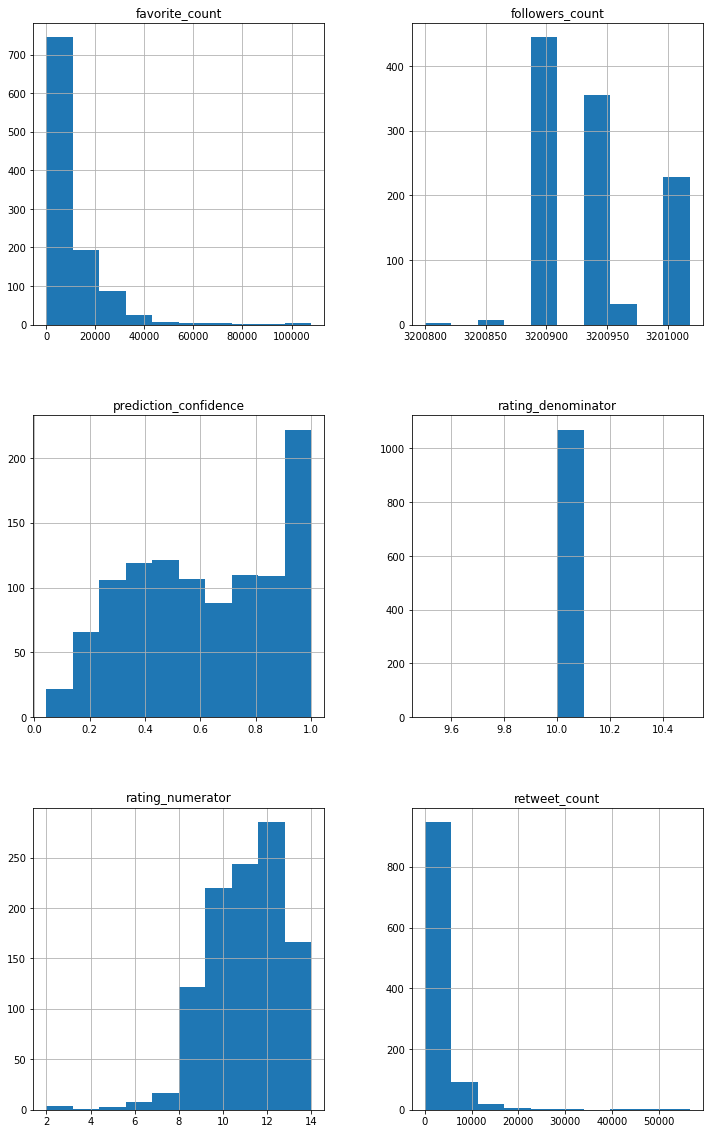

In [105]:
# Plot a histogram of dog_breed freq
df_clean.hist(figsize=(12,20));

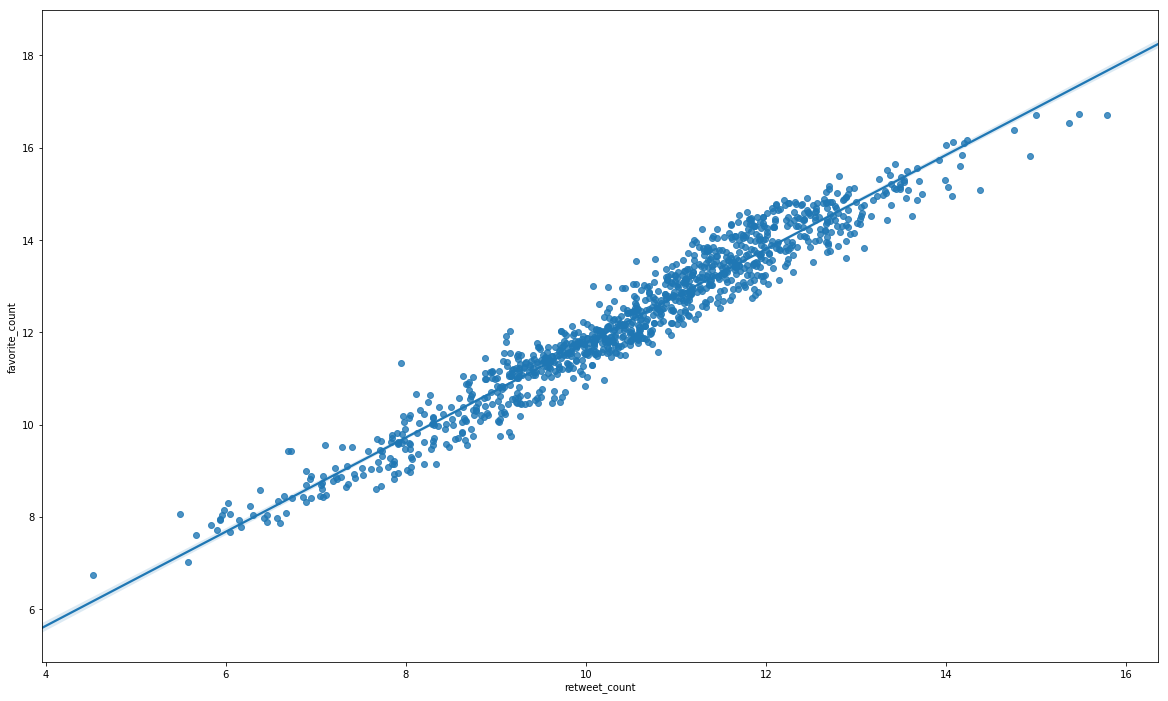

In [104]:
# visualise with a regression plot
dims = (20, 12)
fig, ax = pyplot.subplots(figsize=dims)
sns.regplot(ax=ax, x=np.log2(df_clean['retweet_count']), y=np.log2(df_clean['favorite_count']));

In [107]:
df_clean.rating_numerator[df_clean.rating_numerator <= 8].value_counts().sum()/df_clean.rating_numerator.value_counts().sum()

0.071028037383177575

<a id='report'></a>
## Reporting